<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_6_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Завдання 1
#Завантаження та підготовка даних.

from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['Target'] = housing.target

X = data.drop(columns='Target')
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Завдання 2
#Побудова регресійної моделі.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична помилка (MSE): {mse:.4f}")
print(f"R²: {r2:.4f}")

Середньоквадратична помилка (MSE): 0.5559
R²: 0.5758


In [ ]:
#Завдання 3
#Аналіз перенавчання.

y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Оцінка на навчальній вибірці:")
print(f"Середньоквадратична помилка (MSE) на навчальній вибірці: {mse_train:.4f}")
print(f"R² на навчальній вибірці: {r2_train:.4f}")

print("\nОцінка на тестовій вибірці:")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці: {mse_test:.4f}")
print(f"R² на тестовій вибірці: {r2_test:.4f}")

Оцінка на навчальній вибірці:
Середньоквадратична помилка (MSE) на навчальній вибірці: 0.5179
R² на навчальній вибірці: 0.6126

Оцінка на тестовій вибірці:
Середньоквадратична помилка (MSE) на тестовій вибірці: 0.5559
R² на тестовій вибірці: 0.5758


Модель не демонструє ознак сильного перенавчання. Різниця між результатами на навчальних і тестових вибірках є невеликою, що свідчить про те, що модель узагальнює свої знання на нові дані досить добре.

In [ ]:
#Завдання 4
#Запобігання перенавчанню.
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.01, 0.1, 1, 10, 100]

ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append((-scores.mean(), alpha))

lasso_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_scores.append((-scores.mean(), alpha))

print("Ridge Regression:")
for mse, alpha in ridge_scores:
    print(f"Alpha: {alpha}, MSE: {mse:.4f}")

print("\nLasso Regression:")
for mse, alpha in lasso_scores:
    print(f"Alpha: {alpha}, MSE: {mse:.4f}")

Ridge Regression:
Alpha: 0.01, MSE: 0.5193
Alpha: 0.1, MSE: 0.5193
Alpha: 1, MSE: 0.5193
Alpha: 10, MSE: 0.5193
Alpha: 100, MSE: 0.5200

Lasso Regression:
Alpha: 0.01, MSE: 0.5245
Alpha: 0.1, MSE: 0.6034
Alpha: 1, MSE: 0.9489
Alpha: 10, MSE: 1.3362
Alpha: 100, MSE: 1.3369


Значення MSE для всіх значень параметра alpha від 0.01 до 10 практично однакові (близько 0.5193), лише для alpha = 100 MSE трохи зростає (0.5200).
Це означає, що Ridge модель є досить стабільною при різних значеннях параметра alpha, і можна вибрати будь-яке з менших значень для регуляризації (наприклад, alpha = 0.01).

In [ ]:
#Завдання 5
#Оцінка результатів.

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_test_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression на тестовій вибірці - MSE: {mse_test_ridge:.4f}")
print(f"Ridge Regression на тестовій вибірці - R²: {r2_test_ridge:.4f}")

Ridge Regression на тестовій вибірці - MSE: 0.5559
Ridge Regression на тестовій вибірці - R²: 0.5758


Порівняння результатів моделей.

Базова модель (Linear Regression):

*   MSE: 0.5559
*   R²: 0.5758

Модель з регуляризацією (Ridge Regression, alpha = 0.01):

*   MSE: 0.5559
*   R²: 0.5758

Регуляризація за допомогою Ridge Regression не привела до покращення продуктивності, що може вказувати на те, що початкова лінійна модель була вже достатньо стійкою.
Крос-валідація допомогла підтвердити, що вибір оптимального параметра alpha для Ridge не вплинув на результати, оскільки модель вже демонструвала хорошу стабільність на тренувальних і тестових даних.

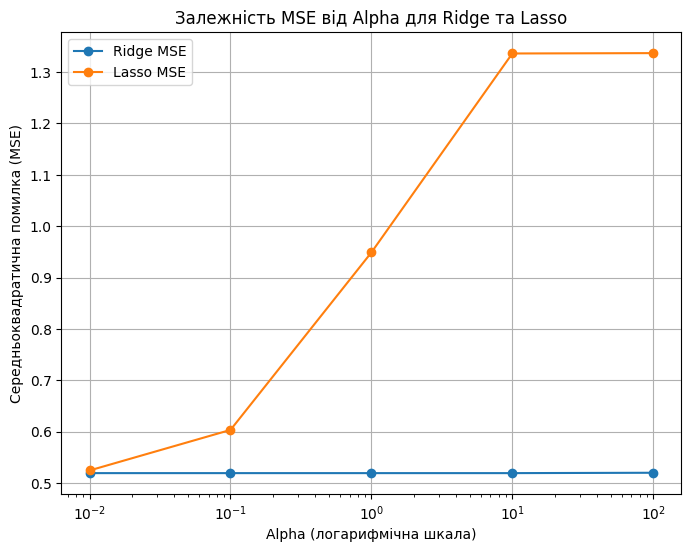

In [ ]:
#Завдання 6
#Візуалізація та висновки.
import matplotlib.pyplot as plt

alphas = [0.01, 0.1, 1, 10, 100]

ridge_mse = [0.5193, 0.5193, 0.5193, 0.5193, 0.5200]
lasso_mse = [0.5245, 0.6034, 0.9489, 1.3362, 1.3369]

plt.figure(figsize=(8, 6))
plt.plot(alphas, ridge_mse, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (логарифмічна шкала)')
plt.ylabel('Середньоквадратична помилка (MSE)')
plt.title('Залежність MSE від Alpha для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

**Висновки щодо ефективності моделей**

Оцінка продуктивності моделей:Базова лінійна регресія та Ridge Regression показали ідентичні результати на тестовій вибірці:

*   MSE: 0.5559
*   R²: 0.5758


Lasso Regression показала гірші результати, особливо при збільшенні параметра регуляризації alpha. Це значить, що в даній задачі Lasso не підходить.

Вплив регуляризації:
Регуляризація не привела до покращення моделі, оскільки початкова лінійна регресія вже добре узагальнювала дані.
Ridge Regression з різними значеннями alpha не значно покращила MSE або R², що означає, що модель не страждала від перенавчання. Введення регуляризації не виявилося корисним у цьому випадку.

Заходи для запобігання перенавчанню:
Було використано регуляризацію (Ridge і Lasso) та крос-валідацію, щоб оцінити і запобігти можливому перенавчанню.
Модель показала стабільні результати на навчальній і тестовій вибірках, що вказує на відсутність значного перенавчання.

Загальні результати:
Початкова лінійна регресія є оптимальною для даної задачі.
Ridge Regression не покращила результат, оскільки модель вже була стійкою і добре узагальнювалася.
Lasso Regression не підходить для цієї задачі, оскільки її результати погіршуються при збільшенні параметра регуляризації.

**Завдання 2.**

Виконати кластеризацію даних.Застосувати метод ліктя або метод силуєтів. Зробити візуалізацію кластерів.Зробити висновки.

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

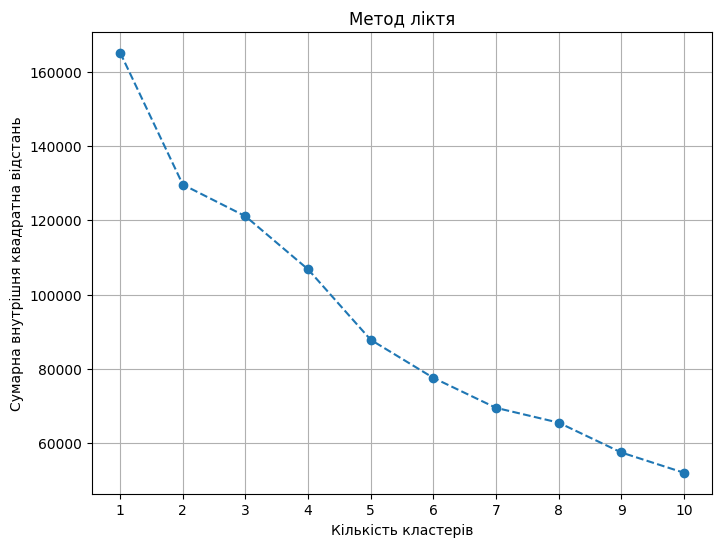

In [ ]:
features = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker = 'o', linestyle = '--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сумарна внутрішня квадратна відстань')
plt.title('Метод ліктя')
plt.xticks(K)
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

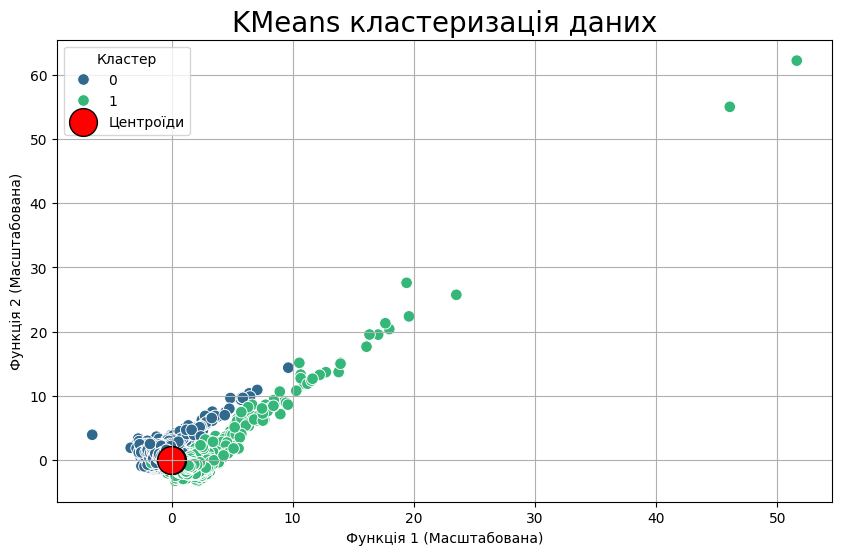

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

features = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette='viridis', legend='full', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='red', label='Центроїди', edgecolor='black')
plt.title('KMeans кластеризація даних', fontsize=20)
plt.xlabel('Функція 1 (Масштабована)')
plt.ylabel('Функція 2 (Масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Аналіз методом ліктя показав, що для даного датасету найкращою є модель з двома кластерами. Це свідчить про те, що дані можна розділити на дві групи, які мають суттєві відмінності.